In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from time import strptime
import os 
import patsy 
from shapely.wkt import loads
import pickle
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
pkl_in_Cin = open('countMedicalFacilitiesWithin2milesCinbyTract.pkl', 'rb')

fac = pickle.load(pkl_in_Cin)

In [4]:
pdb = pd.read_csv('pdb2019trv6_us.csv',encoding = "ISO-8859-1")
cin = pdb[(pdb['State_name'] == 'Ohio') ]
print(cin)
print(cin.columns)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (286) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


             GIDTR  State State_name  County     County_name   Tract  Flag  \
50530  39001770100     39       Ohio       1    Adams County  770100   NaN   
50531  39001770200     39       Ohio       1    Adams County  770200   NaN   
50532  39001770300     39       Ohio       1    Adams County  770300   NaN   
50533  39001770400     39       Ohio       1    Adams County  770400   NaN   
50534  39001770500     39       Ohio       1    Adams County  770500   NaN   
...            ...    ...        ...     ...             ...     ...   ...   
53477  39175938100     39       Ohio     175  Wyandot County  938100   NaN   
53478  39175938200     39       Ohio     175  Wyandot County  938200   NaN   
53479  39175938300     39       Ohio     175  Wyandot County  938300   NaN   
53480  39175938400     39       Ohio     175  Wyandot County  938400   NaN   
53481  39175938500     39       Ohio     175  Wyandot County  938500   NaN   

       Num_BGs_in_Tract  LAND_AREA  AIAN_LAND  ...  \
50530    

In [5]:
var = ['Med_HHD_Inc_ACS_13_17', 'Median_Age_ACS_13_17','pct_College_ACS_13_17',
       'pct_Not_HS_Grad_ACS_13_17','pct_NoHealthIns_65P_ACS_13_17',
       'pct_NH_White_alone_ACS_13_17','pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17', 'pct_Pop_18_24_ACS_13_17',
       'pct_Pop_65plus_ACS_13_17','pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17'
       ,'pct_Two_Plus_Health_Ins_ACS_13_17','Civ_labor_16plus_ACS_13_17','pct_Civ_unemp_16plus_ACS_13_17',
        'Civ_labor_16_24_ACS_13_17','pct_Civ_unemp_16_24_ACS_13_17','Civ_labor_25_44_ACS_13_17',
       'Civ_labor_45_64_ACS_13_17','pct_Civ_unemp_45_64_ACS_13_17','pct_PUB_ASST_INC_ACS_13_17','Tract']


In [6]:
cin = cin.filter(var)
cin.Tract=cin.Tract.astype(float)
fac.CensusTract = fac.CensusTract.astype(float)
#fac.CensusTract = int(fac.CensusTract)
fac.CensusTract = fac.CensusTract *100
df = fac.merge(cin, left_on='CensusTract', right_on='Tract')
df

,CensusTract,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,...,pct_Prs_Blw_Pov_Lev_ACS_13_17,pct_One_Health_Ins_ACS_13_17,Civ_labor_16plus_ACS_13_17,Civ_labor_16_24_ACS_13_17,pct_Civ_unemp_16_24_ACS_13_17,Civ_labor_25_44_ACS_13_17,Civ_labor_45_64_ACS_13_17,pct_Civ_unemp_45_64_ACS_13_17,pct_PUB_ASST_INC_ACS_13_17,Tract
0,5200.0,3,1,7,6,0,1,2,1,1,...,4.27,87.95,2465.0,271.0,0.00,1580.0,531.0,3.77,0.67,5200.0
1,5200.0,3,1,7,6,0,1,2,1,1,...,7.37,84.84,2688.0,428.0,0.00,1718.0,458.0,12.88,0.33,5200.0
2,5200.0,3,1,7,6,0,1,2,1,1,...,24.18,78.57,1675.0,503.0,8.35,658.0,467.0,8.78,5.83,5200.0
3,5301.0,2,1,7,6,0,1,2,1,1,...,13.94,85.84,2648.0,455.0,7.69,1498.0,581.0,1.72,0.64,5301.0
4,5302.0,1,1,4,5,0,1,3,1,1,...,12.41,72.30,2006.0,392.0,1.53,1095.0,393.0,0.00,1.01,5302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,5000.0,2,0,6,5,0,0,1,2,0,...,5.44,86.99,3278.0,537.0,6.52,1796.0,786.0,0.00,1.96,5000.0
380,5000.0,2,0,6,5,0,0,1,2,0,...,25.46,76.12,992.0,180.0,23.33,450.0,330.0,12.42,5.81,5000.0
381,5100.0,1,0,4,5,0,1,2,1,1,...,75.65,67.40,368.0,82.0,0.00,164.0,90.0,17.78,18.86,5100.0
382,5100.0,1,0,4,5,0,1,2,1,1,...,5.16,90.41,1469.0,133.0,2.26,852.0,422.0,0.00,0.68,5100.0


In [7]:
from sodapy import Socrata
client = Socrata("data.cincinnati-oh.gov", None)
results = client.get("3gx7-se9a", limit=11000)

# Convert to pandas DataFrame
ems = pd.DataFrame.from_records(results)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


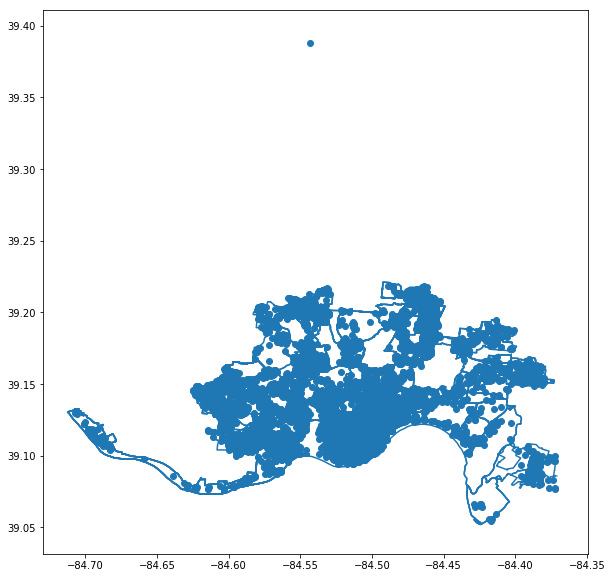

In [8]:
ems.longitude_x = ems.longitude_x.astype(float)
ems.latitude_x = ems.latitude_x.astype(float)
ems_gdf = gpd.GeoDataFrame(
    ems, geometry=gpd.points_from_xy(ems.longitude_x, ems.latitude_x))
cin_gdf = gpd.GeoDataFrame(df, geometry=df.geometry)
fig, ax = plt.subplots(figsize=(10,10))
ems_gdf.plot(ax=ax)
cin_gdf.boundary.plot(ax=ax)
out = pd.DataFrame()
for i in range(len(cin_gdf)):
    temp = ems_gdf[ems_gdf.within(cin_gdf.loc[i,'geometry'])]
    temp['tract'] = cin_gdf.loc[i,'Tract']
    out = pd.concat([out, temp])

In [9]:
out.closed_time_incident = pd.to_datetime(out.closed_time_incident)
out['year_month'] = out.closed_time_incident.dt.year.astype(float) + out.closed_time_incident.dt.month.astype(float)/100
mt = out.groupby([out['year_month'],  out['tract']]).agg({'count'})
mt = mt['event_number']
mt.reset_index(inplace=True)

mt.rename(columns={'count': 'ems_call'}, inplace=True)

In [11]:
cin_gdf = cin_gdf.merge(mt, left_on='Tract', right_on='tract')
cin_gdf.shape
key = cin_gdf.filter(['tract', 'geometry'])
key.drop_duplicates(inplace=True)
key.shape
print(key)

       tract                                           geometry
0     5200.0  POLYGON ((-84.43168 39.15720, -84.43177 39.156...
24    5301.0  POLYGON ((-84.42516 39.15576, -84.42513 39.155...
35    5302.0  POLYGON ((-84.40766 39.15576, -84.40748 39.155...
44    5400.0  POLYGON ((-84.42096 39.16456, -84.41972 39.163...
62    5500.0  MULTIPOLYGON (((-84.39309 39.16722, -84.39303 ...
...      ...                                                ...
3961  4702.0  POLYGON ((-84.39707 39.12197, -84.39719 39.121...
3983  4800.0  POLYGON ((-84.40558 39.13941, -84.40565 39.138...
4004  4900.0  POLYGON ((-84.43892 39.11774, -84.43929 39.117...
4034  5000.0  MULTIPOLYGON (((-84.44870 39.14812, -84.44870 ...
4064  5100.0  POLYGON ((-84.40851 39.14021, -84.40838 39.140...

[115 rows x 2 columns]


In [12]:
filter=['HospitalsGeneralCount2mi', 'HospitalsPsychCount2mi',
       'SurgicalCentersCount2mi', 'UrgentCareCount2mi',
       'WomensClinicsCount2mi', 'PainManagementCount2mi',
       'PhysicalTherapyCount2mi', 'MentalFacilitiesCount2mi',
       'SubstanceAbuseCount2mi', 'OtherMedicalFacilitesCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'HospitalsChildCount2mi', 'ChildFacilitiesCount2mi', 'PharmCount2mi',
       'DrugDropCount2mi', 'NaloxoneDistribCount2mi',
       'Med_HHD_Inc_ACS_13_17', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17', 'pct_NH_White_alone_ACS_13_17',
       'pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17',
       'pct_Pop_18_24_ACS_13_17', 'pct_Pop_65plus_ACS_13_17',
       'pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17',
       'Civ_labor_16plus_ACS_13_17', 'Civ_labor_16_24_ACS_13_17',
       'pct_Civ_unemp_16_24_ACS_13_17', 'Civ_labor_25_44_ACS_13_17',
       'Civ_labor_45_64_ACS_13_17', 'pct_Civ_unemp_45_64_ACS_13_17',
       'pct_PUB_ASST_INC_ACS_13_17',
       'ems_call','tract','geometry']
tot_ems=cin_gdf.drop(columns=['geometry'])
tot_ems=cin_gdf[filter].groupby(['tract']).sum()
print(tot_ems)

         HospitalsGeneralCount2mi  HospitalsPsychCount2mi  \
tract                                                       
200.0                         240                       0   
700.0                         240                       0   
900.0                         288                       0   
1000.0                        600                       0   
1100.0                        480                       0   
...                           ...                     ...   
26900.0                        72                       0   
27000.0                        72                       0   
27100.0                        36                      12   
27200.0                         0                       0   
27400.0                        10                       5   

         SurgicalCentersCount2mi  UrgentCareCount2mi  WomensClinicsCount2mi  \
tract                                                                         
200.0                          0                

In [13]:
print(len(tot_ems.columns))
print(tot_ems.columns)

36
Index(['HospitalsGeneralCount2mi', 'HospitalsPsychCount2mi',
       'SurgicalCentersCount2mi', 'UrgentCareCount2mi',
       'WomensClinicsCount2mi', 'PainManagementCount2mi',
       'PhysicalTherapyCount2mi', 'MentalFacilitiesCount2mi',
       'SubstanceAbuseCount2mi', 'OtherMedicalFacilitesCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'HospitalsChildCount2mi', 'ChildFacilitiesCount2mi', 'PharmCount2mi',
       'DrugDropCount2mi', 'NaloxoneDistribCount2mi', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17', 'pct_NH_White_alone_ACS_13_17',
       'pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17',
       'pct_Pop_18_24_ACS_13_17', 'pct_Pop_65plus_ACS_13_17',
       'pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17',
       'Civ_labor_16plus_ACS_13_17', 'Civ_labor_16_24_ACS_13_17',
       'pct_Civ_unemp_16_24_ACS_13_17', 'Civ_labor_25_44_ACS_13_17',
       'Civ_labor_4

In [14]:
tot_ems = key.merge(tot_ems, on='tract')

Text(0.5, 1.0, '2017-2019 EMS Calls by Census Tract in Cincy, OH')

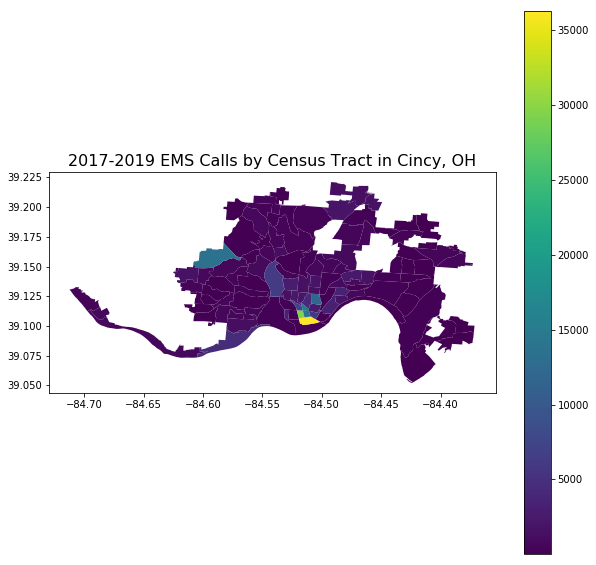

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='ems_call', ax=ax, legend=True)
plt.title('2017-2019 EMS Calls by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'HospitalsGeneralCount2mi by Census Tract in Cincy, OH')

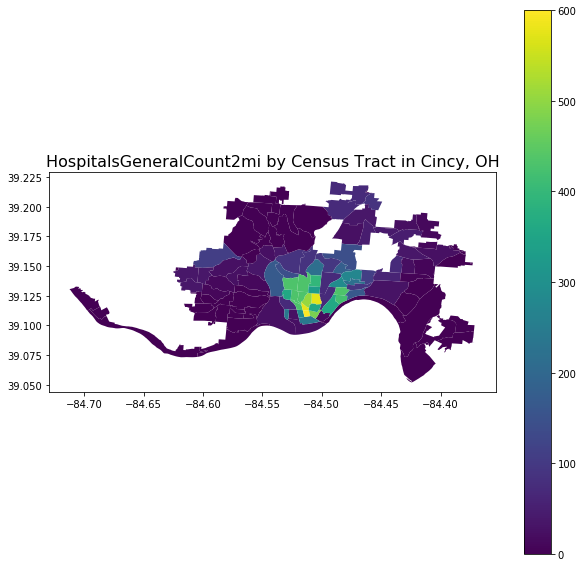

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='HospitalsGeneralCount2mi', ax=ax, legend=True)
plt.title('HospitalsGeneralCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'HospitalsPsychCount2mi by Census Tract in Cincy, OH')

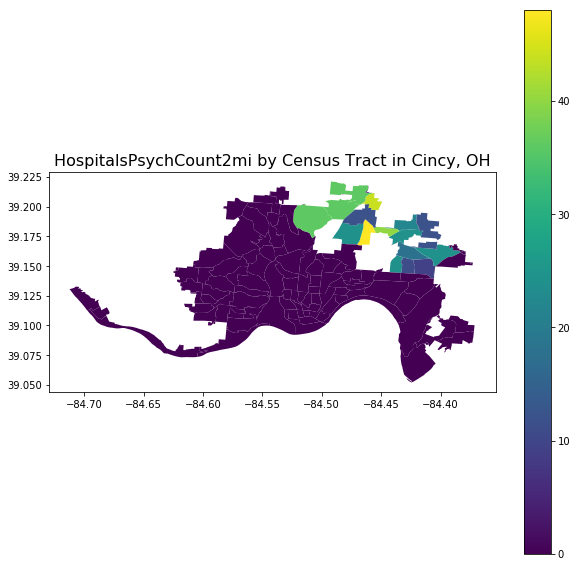

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='HospitalsPsychCount2mi', ax=ax, legend=True)
plt.title('HospitalsPsychCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'SurgicalCentersCount2mi by Census Tract in Cincy, OH')

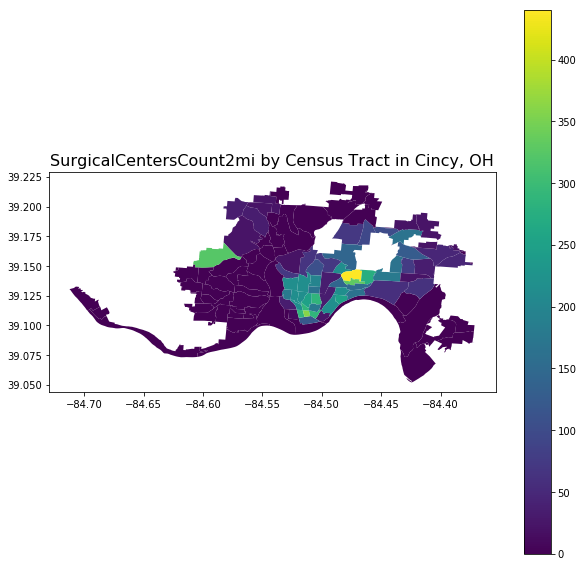

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='SurgicalCentersCount2mi', ax=ax, legend=True)
plt.title('SurgicalCentersCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'UrgentCareCount2mi by Census Tract in Cincy, OH')

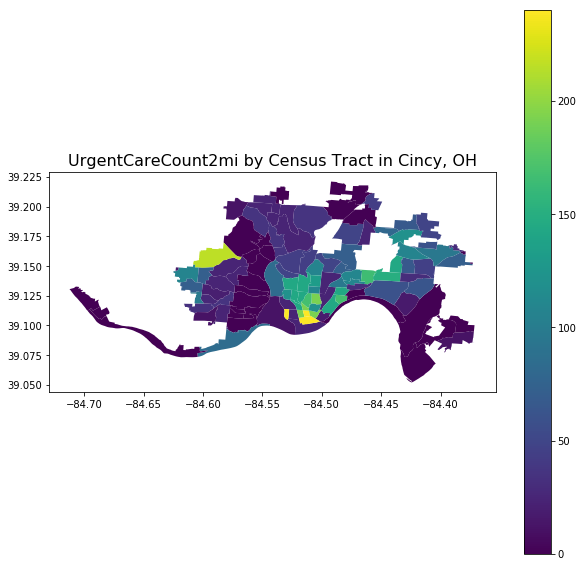

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='UrgentCareCount2mi', ax=ax, legend=True)
plt.title('UrgentCareCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'WomensClinicsCount2mi by Census Tract in Cincy, OH')

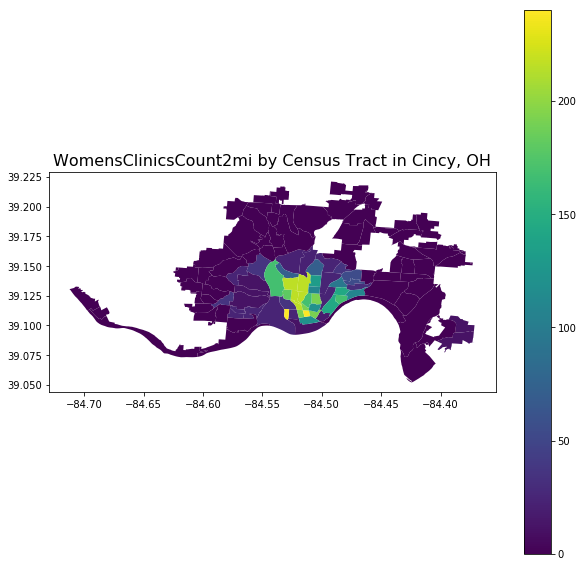

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='WomensClinicsCount2mi', ax=ax, legend=True)
plt.title('WomensClinicsCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'PainManagementCount2mi by Census Tract in Cincy, OH')

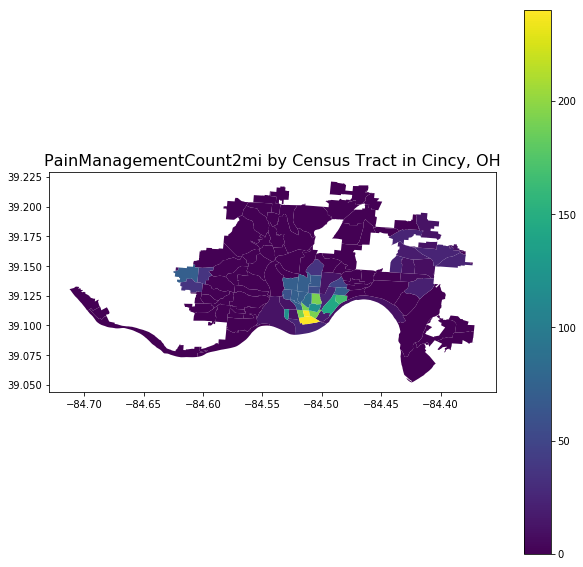

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='PainManagementCount2mi', ax=ax, legend=True)
plt.title('PainManagementCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'PhysicalTherapyCount2mi by Census Tract in Cincy, OH')

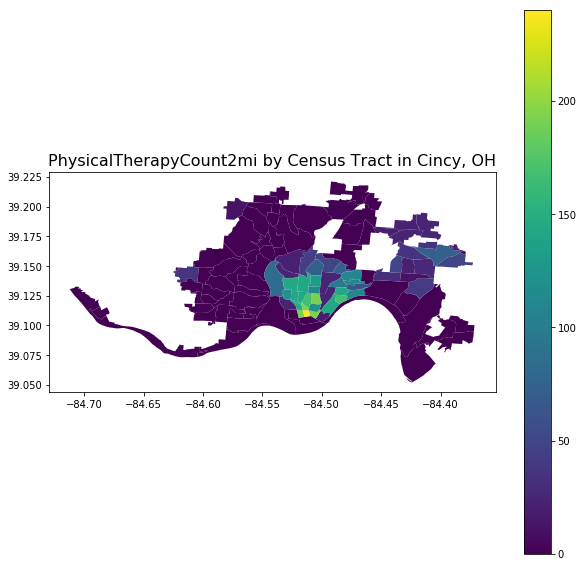

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='PhysicalTherapyCount2mi', ax=ax, legend=True)
plt.title('PhysicalTherapyCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'MentalFacilitiesCount2mi by Census Tract in Cincy, OH')

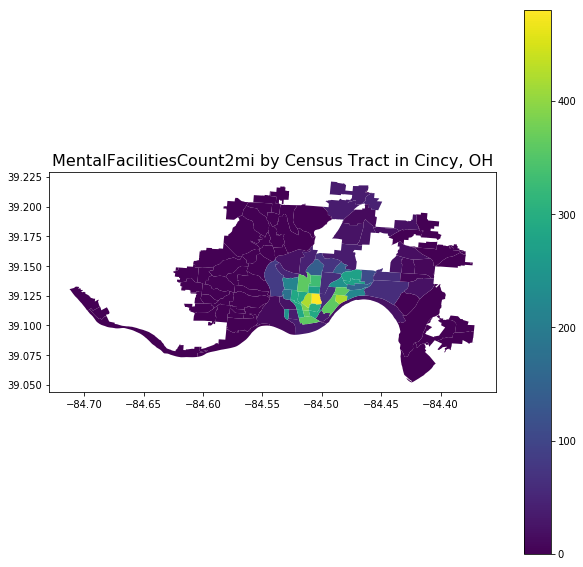

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='MentalFacilitiesCount2mi', ax=ax, legend=True)
plt.title('MentalFacilitiesCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'SubstanceAbuseCount2mi by Census Tract in Cincy, OH')

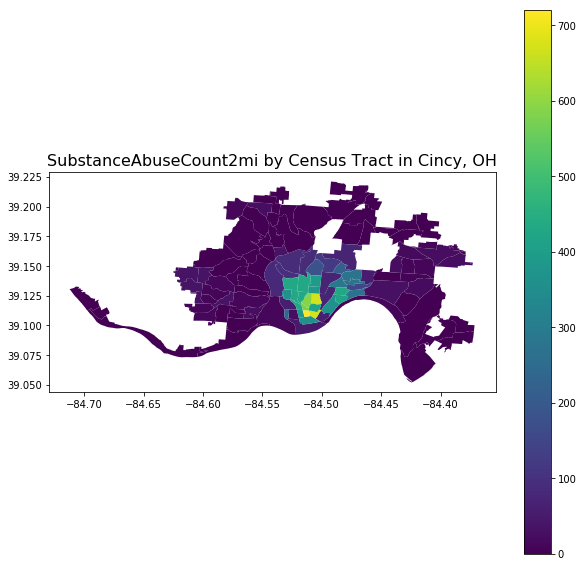

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='SubstanceAbuseCount2mi', ax=ax, legend=True)
plt.title('SubstanceAbuseCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'OtherMedicalFacilitesCount2mi by Census Tract in Cincy, OH')

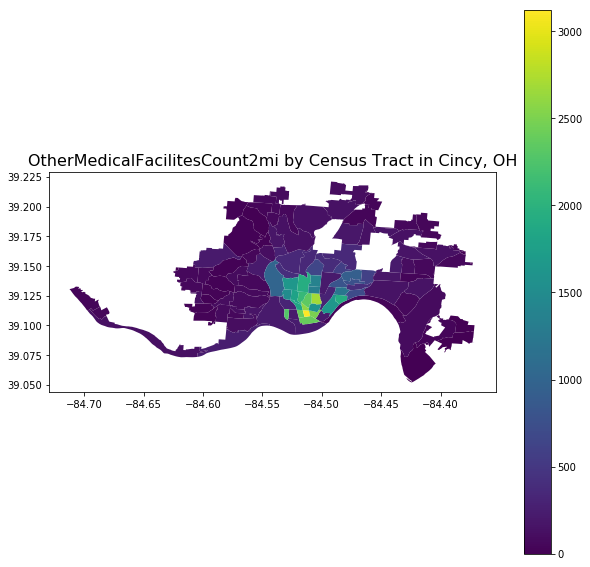

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='OtherMedicalFacilitesCount2mi', ax=ax, legend=True)
plt.title('OtherMedicalFacilitesCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'NursingAssistedLiveCount2mi by Census Tract in Cincy, OH')

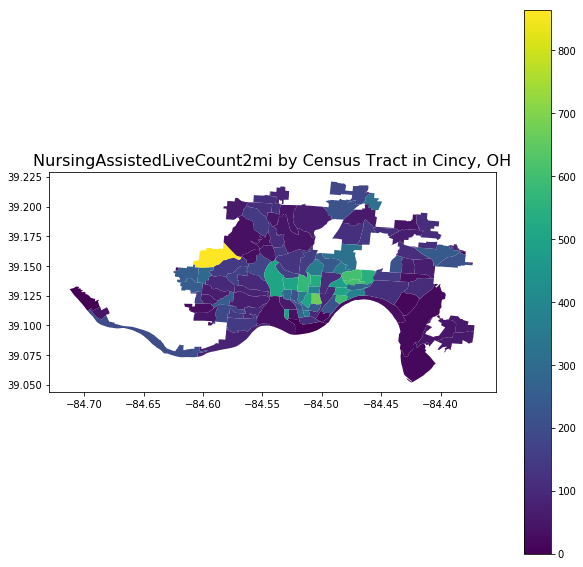

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='NursingAssistedLiveCount2mi', ax=ax, legend=True)
plt.title('NursingAssistedLiveCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'HospiceCount2mi by Census Tract in Cincy, OH')

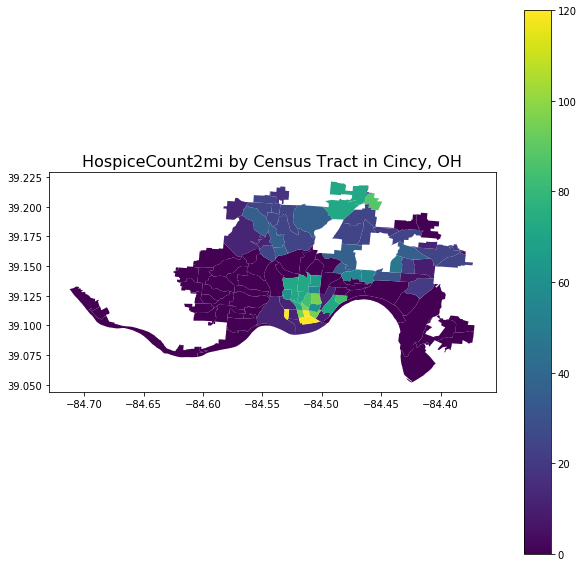

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='HospiceCount2mi', ax=ax, legend=True)
plt.title('HospiceCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'HospitalsChildCount2mi by Census Tract in Cincy, OH')

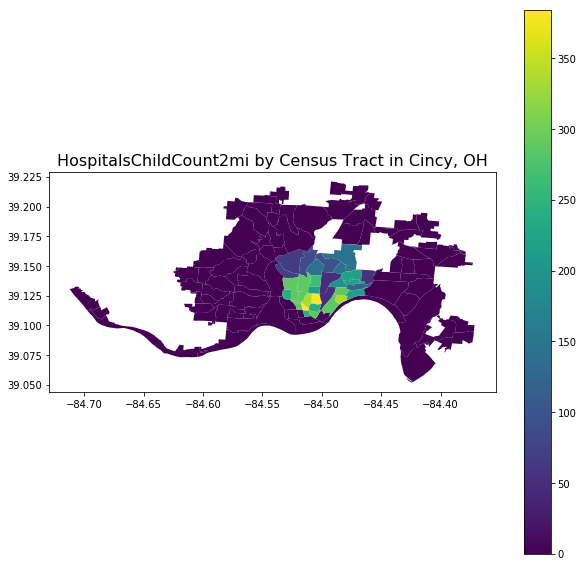

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='HospitalsChildCount2mi', ax=ax, legend=True)
plt.title('HospitalsChildCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'ChildFacilitiesCount2mi by Census Tract in Cincy, OH')

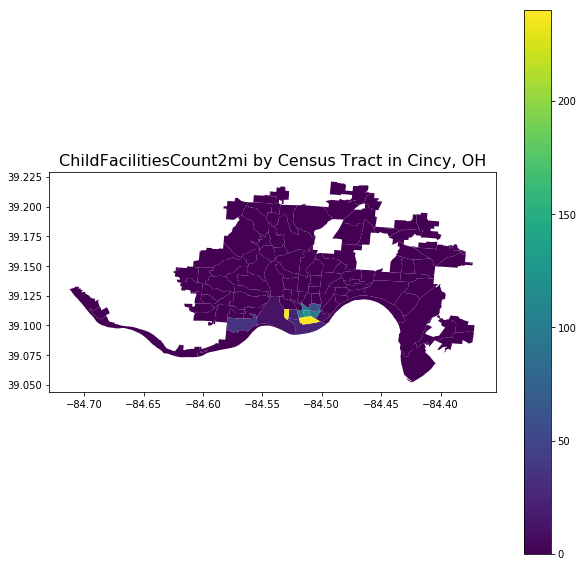

In [38]:
"""
'WomensClinicsCount2mi', 'PainManagementCount2mi',
       'PhysicalTherapyCount2mi', 'MentalFacilitiesCount2mi',
       'SubstanceAbuseCount2mi', 'OtherMedicalFacilitesCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'HospitalsChildCount2mi', 'ChildFacilitiesCount2mi', 'PharmCount2mi',
       'DrugDropCount2mi', 'NaloxoneDistribCount2mi', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17', 'pct_NH_White_alone_ACS_13_17',
       'pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17',
       'pct_Pop_18_24_ACS_13_17', 'pct_Pop_65plus_ACS_13_17',
       'pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17',
       'Civ_labor_16plus_ACS_13_17', 'Civ_labor_16_24_ACS_13_17',
       'pct_Civ_unemp_16_24_ACS_13_17', 'Civ_labor_25_44_ACS_13_17',
       'Civ_labor_45_64_ACS_13_17', 'pct_Civ_unemp_45_64_ACS_13_17',
       'pct_PUB_ASST_INC_ACS_13_17',
"""
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='ChildFacilitiesCount2mi', ax=ax, legend=True)
plt.title('ChildFacilitiesCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'PharmCount2mi by Census Tract in Cincy, OH')

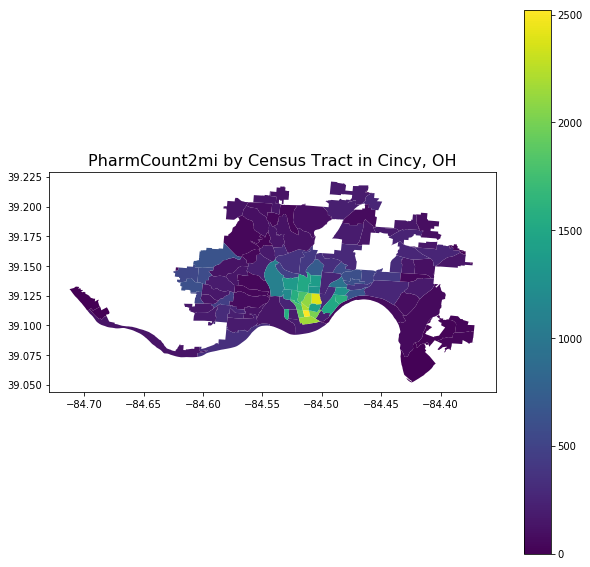

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='PharmCount2mi', ax=ax, legend=True)
plt.title('PharmCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'DrugDropCount2mi by Census Tract in Cincy, OH')

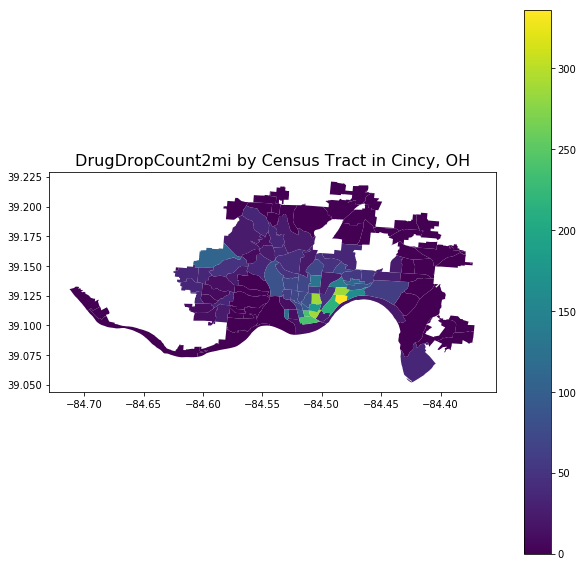

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='DrugDropCount2mi', ax=ax, legend=True)
plt.title('DrugDropCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'NaloxoneDistribCount2mi by Census Tract in Cincy, OH')

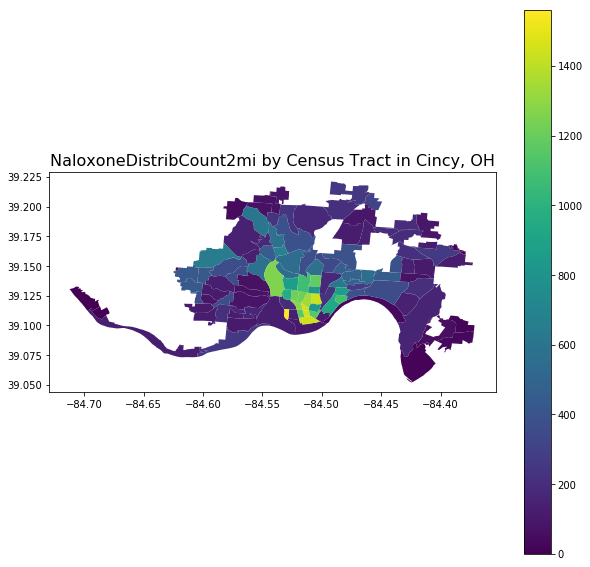

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='NaloxoneDistribCount2mi', ax=ax, legend=True)
plt.title('NaloxoneDistribCount2mi by Census Tract in Cincy, OH' , size=16)

Text(0.5, 1.0, 'pct_Males_ACS_13_17 by Census Tract in Cincy, OH')

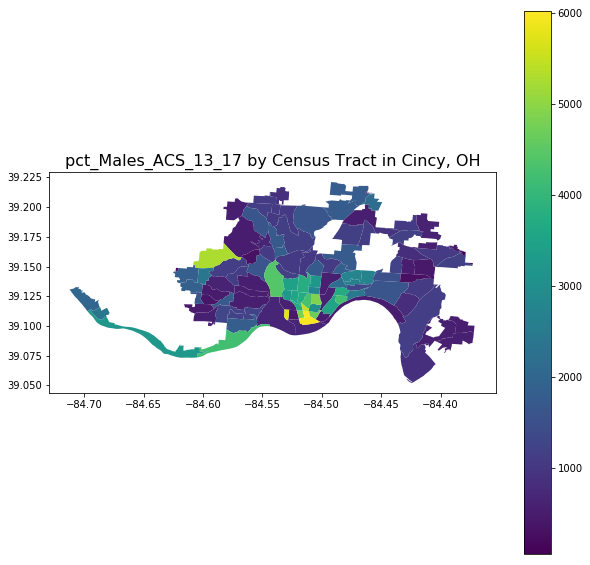

In [42]:

fig, ax = plt.subplots(figsize=(10,10))
tot_ems.plot(column='pct_Males_ACS_13_17', ax=ax, legend=True)
plt.title('pct_Males_ACS_13_17 by Census Tract in Cincy, OH' , size=16)

Index(['HospitalsGeneralCount2mi', 'HospitalsPsychCount2mi',
       'SurgicalCentersCount2mi', 'UrgentCareCount2mi',
       'WomensClinicsCount2mi', 'PainManagementCount2mi',
       'PhysicalTherapyCount2mi', 'MentalFacilitiesCount2mi',
       'SubstanceAbuseCount2mi', 'OtherMedicalFacilitesCount2mi',
       'NursingAssistedLiveCount2mi', 'HospiceCount2mi',
       'HospitalsChildCount2mi', 'ChildFacilitiesCount2mi', 'PharmCount2mi',
       'DrugDropCount2mi', 'NaloxoneDistribCount2mi', 'Median_Age_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_NoHealthIns_65P_ACS_13_17', 'pct_NH_White_alone_ACS_13_17',
       'pct_NH_AIAN_alone_ACS_13_17', 'pct_Males_ACS_13_17',
       'pct_Pop_18_24_ACS_13_17', 'pct_Pop_65plus_ACS_13_17',
       'pct_Prs_Blw_Pov_Lev_ACS_13_17', 'pct_One_Health_Ins_ACS_13_17',
       'Civ_labor_16plus_ACS_13_17', 'Civ_labor_16_24_ACS_13_17',
       'pct_Civ_unemp_16_24_ACS_13_17', 'Civ_labor_25_44_ACS_13_17',
       'Civ_labor_45_6

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


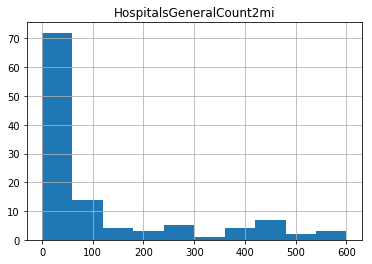

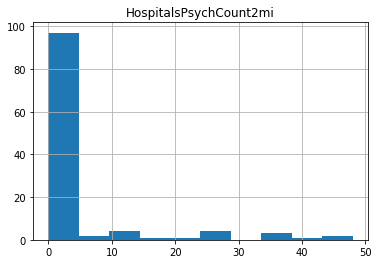

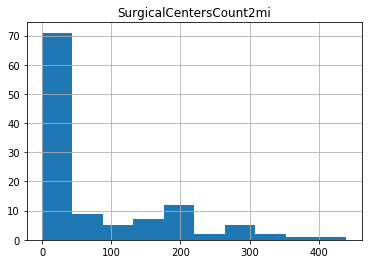

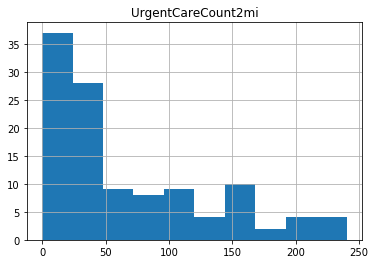

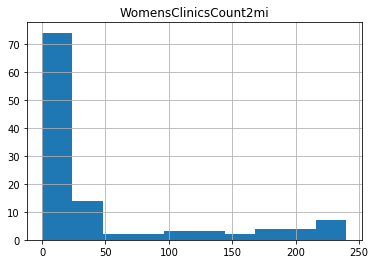

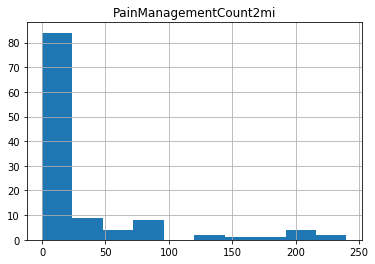

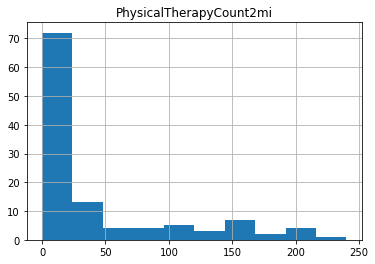

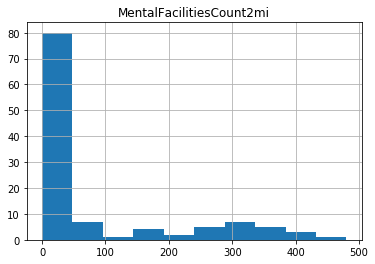

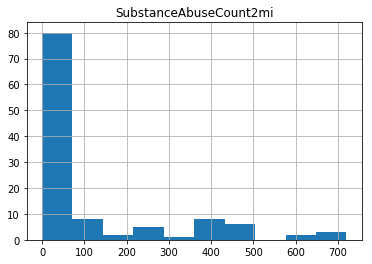

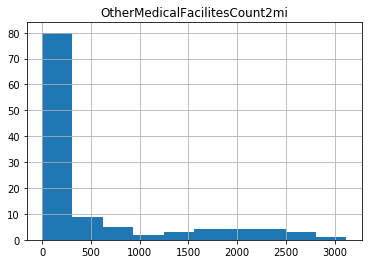

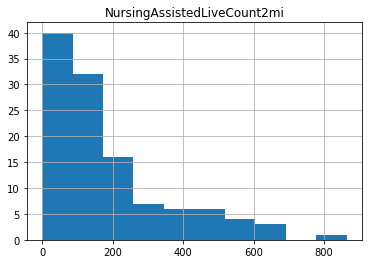

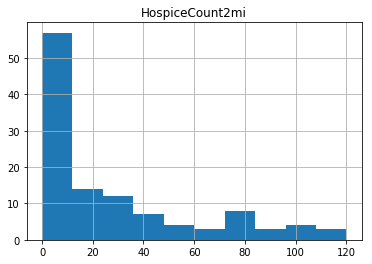

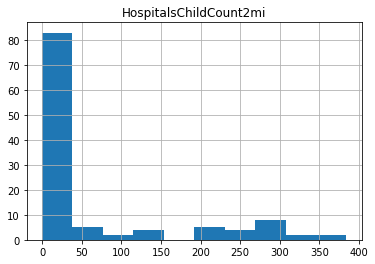

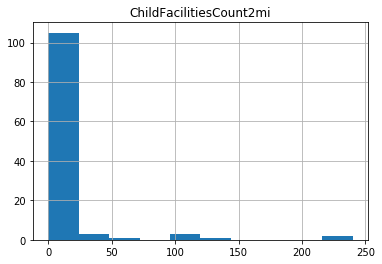

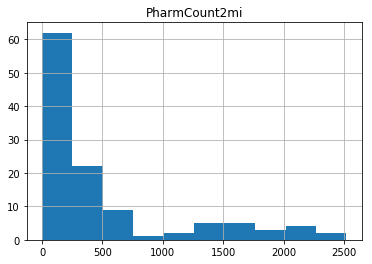

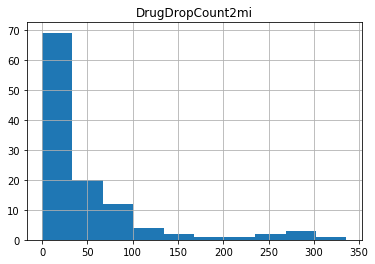

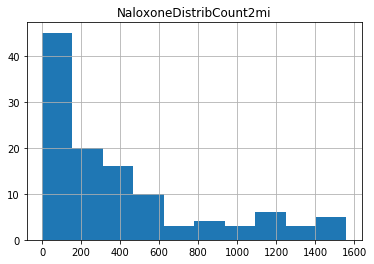

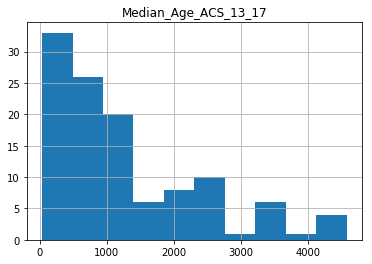

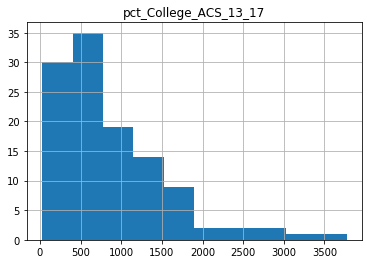

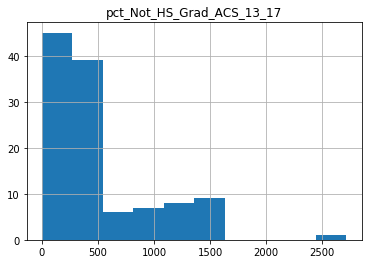

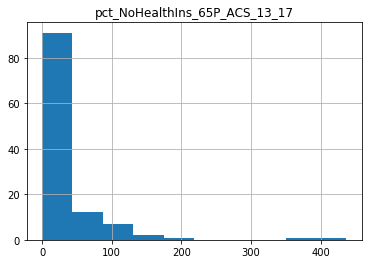

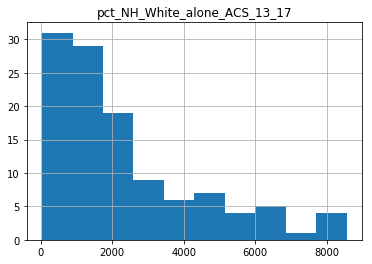

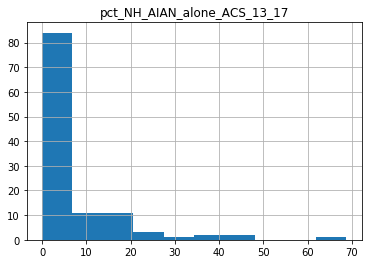

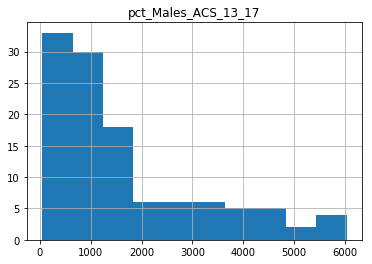

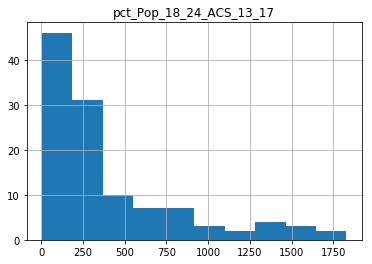

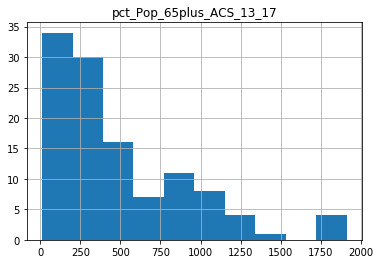

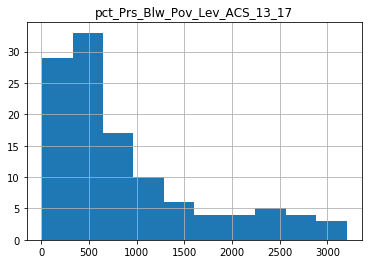

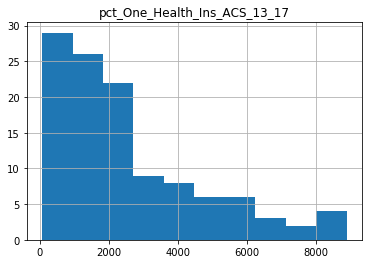

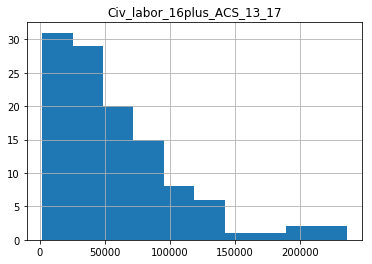

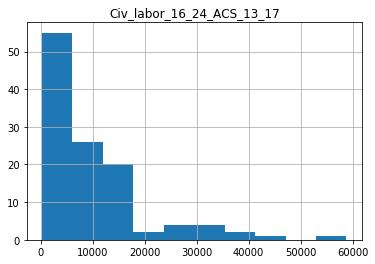

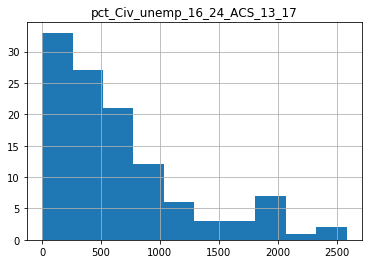

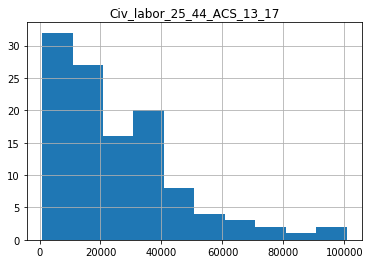

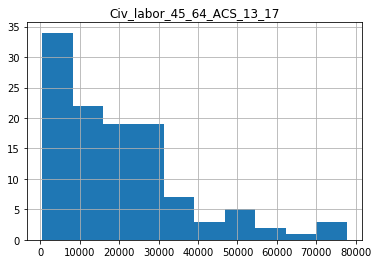

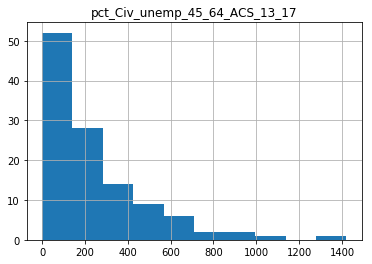

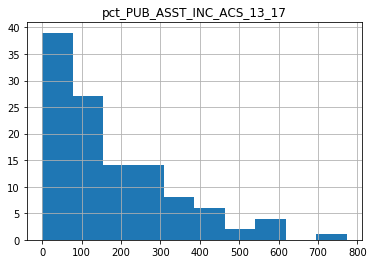

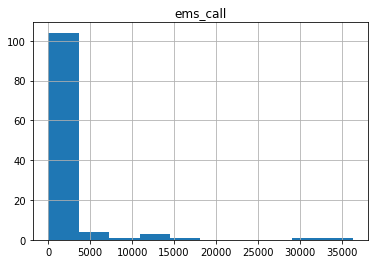

In [48]:
ems_hist=tot_ems.drop(columns=['tract','geometry'])
print(ems_hist.columns)

for column in ems_hist.columns:
    ems_hist.hist(column)